# Лабораторная работа №3. Классификация текстов.
## Выполнила: Залесская Галина, 16ПМИ 

In [1]:
import os
import re
import itertools
import warnings
import numpy as np
import matplotlib.pyplot as plt
from lxml import etree
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier

%matplotlib inline

## Data preparation

In [2]:
news_df = open('news.xml').read()

In [3]:
root = etree.fromstring(news_df)
catalog = []

for element_lvl1 in root:
    news = ['', '']
    for element_lvl2 in element_lvl1:
        if element_lvl2.tag == "category":
            news[1] = element_lvl2.text
        else:
            if element_lvl2.text is not None:
                news[0] += element_lvl2.text + '\n'
    news[0] = ' '.join(re.findall(r'[a-zA-Z\n]+', news[0]))
    catalog.append(news)

In [4]:
def get_tfidf_representation(data_train):
    vectorizer = TfidfVectorizer(stop_words='english', strip_accents='ascii')
    tfidf_train = vectorizer.fit_transform(data_train)
    tfidf_train = tfidf_train[np.arange(len(data_train))] 
    print(tfidf_train.shape)
    return vectorizer, tfidf_train

In [5]:
from sklearn import preprocessing
X = [x for [x, y] in catalog]
y = [y for [x, y] in catalog]
vectorizer, X = get_tfidf_representation(X)
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

(249, 13338)


In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Этот метод позволит разбить обучающую и тестовую выборку на одинаковые по соотношению классов части, 
# что улучшит качество классификации

In [8]:
print(Counter(y)) #распределение по категориям в исходной выборке
print(Counter(y_test)) #распределение по категориям в тестовой выборке

Counter({5: 86, 4: 49, 2: 38, 3: 31, 0: 31, 1: 14})
Counter({5: 21, 3: 8, 2: 8, 4: 8, 0: 3, 1: 2})


# Models  Building

1) **Logistic Regression**

2) **Linear SVM**

3) **SVM**

4) **Random Forest**

5) **Gradient Boosting Trees**

6) **Naive Bayes**

7) **Ada Boost**

8) **kNN**

9) **Perceptron**

## Classifiers definition and training 

In [9]:
%%time
predictor_lr = LogisticRegression(C=2,dual=False).fit(X_train, y_train)
y_pred_lr = predictor_lr.predict(X_test)
print('LR accuracy: {}%'.format(round(np.mean(y_test == y_pred_lr), 2)))

/home/kotik/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/kotik/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR accuracy: 0.78%
CPU times: user 140 ms, sys: 8.19 ms, total: 149 ms
Wall time: 273 ms


In [10]:
%%time
predictor_svc = LinearSVC().fit(X_train, y_train)
y_pred_svc = predictor_svc.predict(X_test)
print('LinearSVC accuracy: {}%'.format(round(np.mean(y_test == y_pred_svc), 2)))

LinearSVC accuracy: 0.92%
CPU times: user 89.7 ms, sys: 0 ns, total: 89.7 ms
Wall time: 44.8 ms


In [11]:
%%time
predictor_svm = SVC().fit(X_train, y_train)
y_pred_svm = predictor_svm.predict(X_test)
print('SVM accuracy: {}%'.format(round(np.mean(y_test == y_pred_svm), 2)))

SVM accuracy: 0.42%
CPU times: user 222 ms, sys: 0 ns, total: 222 ms
Wall time: 212 ms


/home/kotik/anaconda3/envs/nlp/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
%%time
predictor_rf = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)
y_pred_rf = predictor_rf.predict(X_test)
print('RF accuracy: {}%'.format(round(np.mean(y_test == y_pred_rf), 2)))

RF accuracy: 0.72%
CPU times: user 2.16 s, sys: 15 ms, total: 2.18 s
Wall time: 2.19 s


In [13]:
%%time
predictor_gbt = GradientBoostingClassifier(n_estimators=100).fit(X_train, y_train)
y_pred_gbt = predictor_gbt.predict(X_test)
print('GBT accuracy: {}%'.format(round(np.mean(y_test == y_pred_gbt), 2)))

GBT accuracy: 0.72%
CPU times: user 14.5 s, sys: 96 µs, total: 14.5 s
Wall time: 14.5 s


In [14]:
%%time
predictor_nb = MultinomialNB().fit(X_train, y_train)
y_pred_nb = predictor_nb.predict(X_test)
print('NB accuracy: {}%'.format(round(np.mean(y_test == y_pred_nb), 2)))

NB accuracy: 0.56%
CPU times: user 9.61 ms, sys: 3.95 ms, total: 13.6 ms
Wall time: 9.79 ms


In [15]:
%%time
predictor_ada = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)
y_pred_ada = predictor_ada.predict(X_test)
print('ADA accuracy: {}%'.format(round(np.mean(y_test == y_pred_ada), 2)))

ADA accuracy: 0.58%
CPU times: user 1.55 s, sys: 15.7 ms, total: 1.57 s
Wall time: 1.46 s


In [16]:
%%time
predictor_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_knn = predictor_knn.predict(X_test)
print('KNN accuracy: {}%'.format(round(np.mean(y_test == y_pred_knn), 2)))

KNN accuracy: 0.88%
CPU times: user 15.2 ms, sys: 3.81 ms, total: 19 ms
Wall time: 89.3 ms


In [17]:
%%time
predictor_nn = MLPClassifier(alpha=1, max_iter=1000).fit(X_train, y_train)
y_pred_nn = predictor_nn.predict(X_test)
print('NN accuracy: {}%'.format(round(np.mean(y_test == y_pred_nn), 2)))

NN accuracy: 0.88%
CPU times: user 50.8 s, sys: 4.59 s, total: 55.4 s
Wall time: 28 s


Таким образом, мы можем отделить в рамках этой задачи и этого датасета 
- плохонькие классификаторы (нелинейный SVM, AdaBoost, Naive Bayes), 
- хорошие (Logistic Regression, RandomForest, GradientBoosting, kNN, MultiLayer perceptron) 
- отличные (линейный SVM)

Соответственно, мы можем можем подобрать лучшие параметры для этих классификаторов

## Parameters tuning

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import expon

skf = StratifiedKFold(n_splits=5, random_state=42)

In [19]:
#Random Forest
warnings.filterwarnings('ignore')
param_grid = {
              'n_estimators':[10,100,500], 
              'criterion': ['gini', 'entropy'],
              'max_depth': [2,3,4,5, None]
              }

RF_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=skf, verbose=0, scoring='accuracy').fit(X_train, y_train)
print("RF accuracy on train: ", RF_model.best_score_)
y_pred_RF = RF_model.best_estimator_.predict(X_test)
print('RF accuracy on val: {}%'.format(round(np.mean(y_test == y_pred_RF), 2)))
print('f1_score: ', f1_score(y_test, y_pred_RF, average='weighted'))

RF accuracy on train:  0.5879396984924623
RF accuracy on val: 0.58%
f1_score:  0.561168493584013


In [20]:
#Logistic Regression
param_grid = {
              'C': expon(scale=1).rvs(size=10)+[1], 
              'tol': expon(scale=0.0005).rvs(size=10) + [1e-4],
              }

LR_model = GridSearchCV(LogisticRegression(), param_grid, cv=skf, verbose=0, scoring='accuracy').fit(X_train, y_train)
print("LR accuracy on train: ", LR_model.best_score_)
y_pred_LR = LR_model.best_estimator_.predict(X_test)
print('LR accuracy on val: {}%'.format(round(np.mean(y_test == y_pred_LR), 2)))
print('f1_score: ', f1_score(y_test, y_pred_LR, average='weighted'))

LR accuracy on train:  0.6381909547738693
LR accuracy on val: 0.84%
f1_score:  0.8320293040293041


In [21]:
#Gradient Boosting
param_grid = {
              'learning_rate': expon(scale=0.1).rvs(size=10)+[0.1], #имитация RandomSearch
              'n_estimators': [10, 50, 100]
              }

GB_model = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=skf, verbose=0, scoring='accuracy').fit(X_train, y_train)
print("GB accuracy on train: ", GB_model.best_score_)
y_pred_GB = GB_model.best_estimator_.predict(X_test)
print('GB accuracy on val: {}%'.format(round(np.mean(y_test == y_pred_GB), 2)))
print('f1_score: ', f1_score(y_test, y_pred_GB, average='weighted'))

GB accuracy on train:  0.7386934673366834
GB accuracy on val: 0.72%
f1_score:  0.7204615384615384


In [22]:
#kNN
param_grid = { 
              'n_neighbors': [1,2,3,4,5,6,7,8,9,10]
              }

kNN_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=skf, verbose=0, scoring='accuracy').fit(X_train, y_train)
print("kNN accuracy on train: ", kNN_model.best_score_)
y_pred_kNN = kNN_model.best_estimator_.predict(X_test)
print('kNN accuracy on val: {}%'.format(round(np.mean(y_test == y_pred_kNN), 2)))
print('f1_score: ', f1_score(y_test, y_pred_kNN, average='weighted'))

kNN accuracy on train:  0.678391959798995
kNN accuracy on val: 0.84%
f1_score:  0.8608351648351649


In [23]:
#MultiLayer Perceptron
warnings.filterwarnings('ignore')
param_grid = {
              'alpha': [1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1], 
              'solver':['lbfgs', 'sgd', 'adam'],
              'hidden_layer_sizes': [[100],[50],[100,100], [100,100,100]],
              'activation':['identity', 'logistic', 'tanh', 'relu']
              }

NN_model = GridSearchCV(MLPClassifier(), param_grid, cv=skf, verbose=0, scoring='accuracy').fit(X_train, y_train)
print("NN accuracy on train: ", NN_model.best_score_)
y_pred_NN = NN_model.best_estimator_.predict(X_test)
print('NN accuracy on val: {}%'.format(round(np.mean(y_test == y_pred_NN), 2)))
print('f1_score: ', f1_score(y_test, y_pred_NN, average='weighted'))

NN accuracy on train:  0.7487437185929648
NN accuracy on val: 0.92%
f1_score:  0.9229215686274511


In [24]:
#Linear SVC
warnings.filterwarnings('ignore')
param_grid = {
              'C': expon(scale=1).rvs(size=10)+[1], 
              'tol': expon(scale=0.0005).rvs(size=10) + [1e-4]
              }

SVC_model = GridSearchCV(LinearSVC(), param_grid, cv=skf, verbose=0, scoring='accuracy').fit(X_train, y_train)
print("SVC accuracy on train: ", SVC_model.best_score_)
y_pred_SVC = SVC_model.best_estimator_.predict(X_test)
print('SVC accuracy on val: {}%'.format(round(np.mean(y_test == y_pred_SVC), 2)))
print('f1_score: ', f1_score(y_test, y_pred_SVC, average='weighted'))

SVC accuracy on train:  0.7185929648241206
SVC accuracy on val: 0.94%
f1_score:  0.9385882352941176


## Best results visualization 

In [41]:
from sklearn.metrics import roc_auc_score, precision_recall_curve

In [44]:
print("Neural Network ", NN_model.best_params_,"\nResult:", f1_score(y_test, y_pred_NN, average='weighted'))
print("\n\nLinear SVC ", SVC_model.best_params_, "\nResult:", f1_score(y_test, y_pred_SVC, average='weighted'))

Neural Network  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': [100, 100, 100], 'solver': 'adam'} 
Result: 0.9229215686274511


Linear SVC  {'C': 2.2860713103449877, 'tol': 0.0003936854888847022} 
Result: 0.9385882352941176


Итак, лучшие результаты были с помощью трехслойного перцептрона (92%) и линейного SVC (94%). Посмотрим, на каких классах эти модели ошибаются.

In [25]:
def plot_confusion_matrix(cm, title='Contingency matrix'):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(7, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5]
    classes = le.classes_
    plt.xticks(tick_marks, classes, rotation=45, size=14)
    plt.yticks(tick_marks, classes, rotation=45,size=14)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)


In [62]:
def y_binary_y_scores(model):
    #для построения ROC кривой нужно бинарное отображение, построим y_test_binary по правилу угадал-не угадал
    y_pred = model.best_estimator_.predict(X_test)
    y_test_binary = (y_pred == y_test)
#     probabilities = model.best_estimator_.predict_proba(X_test)
    probabilities = model.best_estimator_.decision_function(X_test)
    y_score = []
    for i in range(len(y_pred)):
        y_score.append(probabilities[i,y_pred[i]])
    return y_test_binary, y_score

In [48]:
def plot_ROC(model):
    y_test_binary, y_score = y_binary_y_scores(model)
    fpr, tpr, thresholds = roc_curve(y_test_binary,y_score)

    plt.figure(figsize=(15, 5))
    inds = np.argsort(fpr)
    plt.plot(fpr[inds], tpr[inds])
    plt.plot(fpr, tpr)
    plt.grid(True)
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.plot()

    roc_auc = roc_auc_score(y_test_binary,y_score )
    print('AUC score: {}'.format(roc_auc, 2))

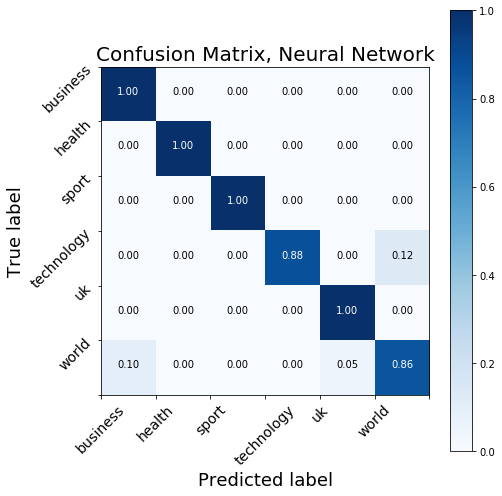

In [42]:
cmt_NN = confusion_matrix(y_test, y_pred_NN)
plot_confusion_matrix(cmt_NN, title='Confusion Matrix, Neural Network')

Какая красота! Существует небольшая неточность: класс "world" пару раз ошибочно определился как "business" и "United Kindom (uk)". А "technology" - как "world". Вообще путаница "world" и "uk" вполне понятна

AUC score: 0.8315217391304348


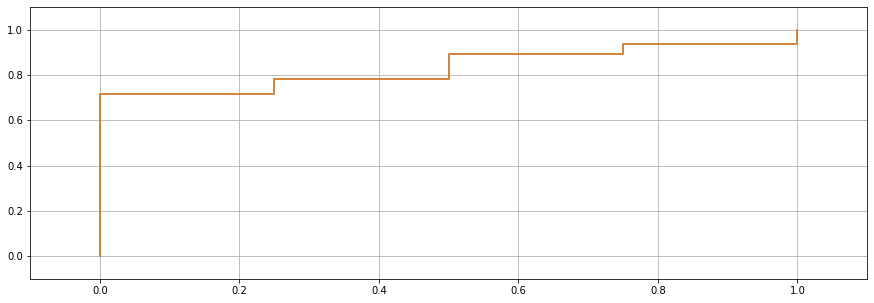

In [61]:
plot_ROC(NN_model)

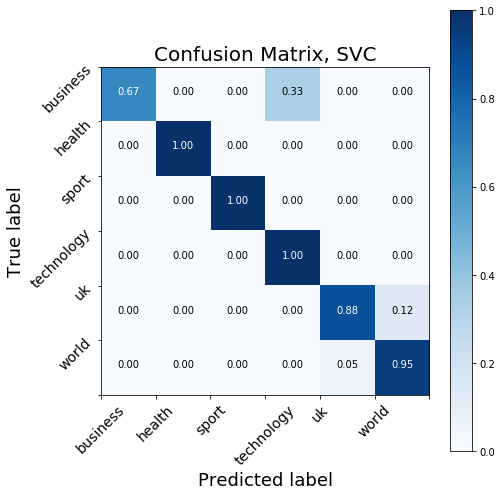

In [65]:
cmt_SVC = confusion_matrix(y_test, y_pred_SVC)
plot_confusion_matrix(cmt_SVC, title='Confusion Matrix, SVC')

Тоже здорово получилось! "UK" немного путается с "world", а "business" c "technology", что тоже очень понятно.

AUC score: 0.8368794326241135


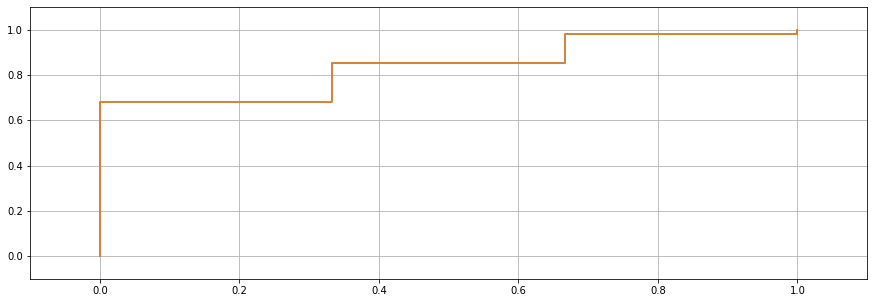

In [66]:
plot_ROC(SVC_model)

Проведенный анализ показал, что линейный SVC дает такую же точность (даже чуть выше), как и 3-слойный перцептрон (93% f1 score), но первому требуется меньше секунды на предсказание, а нейронной сети - а то и полминуты.